<a href="https://colab.research.google.com/github/kmedri/Omdena_Predicting_RTC_Severity/blob/main/Kevin_Accident_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group One - Predicting RTC Severity

Import Libraries

In [24]:
# data manipulation
# conda install -c conda-forge pandas
import pandas as pd
# conda install -c conda-forge numpy
import numpy as np
# conda install -c conda-forge openpyxl
import openpyxl
# conda install -c conda-forge missingno
import missingno as msno

# data visualisation
# conda install -c conda-forge matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# conda install -c conda-forge seaborn
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

#  For showing all columns in Pandas
pd.set_option('display.max_columns', None)

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

Import files from Google Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [26]:
%cd /content/drive/My Drive/Omdena_Liverpool_Project/DATA/parquet

/content/drive/.shortcut-targets-by-id/13C0hJDG3MCQB3jYvTCeWOeK3LQLLUZMA/Omdena_Liverpool_Project/DATA/parquet


In [27]:
accident = pd.read_parquet('accident_data.parquet')

First look at the data

In [28]:
accident

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,None,0.0,Serious,None,04/01/2005,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,None,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,None,0.0,Slight,None,06/01/2005,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,None,0.0,Slight,None,07/01/2005,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,None,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,None,0.0,None,0.0,Slight,None,10/01/2005,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,201091NM01760,A,95.0,None,0.0,Slight,None,18/02/2010,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,57.374005,Daylight,Highland,Highland,311830.0,832450.0,-3.467828,None,2,1,0.0,0.0,Northern,Dry,Single carriageway,None,60,07:00,Rural,Fine no high winds,2010,Yes
1048571,201091NM01881,A,95.0,None,0.0,Slight,None,21/02/2010,Sunday,1.0,Data missing or out of range,Not at junction or within 20 metres,57.232273,Darkness - no lighting,Highland,Highland,290880.0,817170.0,-3.809281,None,1,1,0.0,0.0,Northern,Frost or ice,Single carriageway,None,60,03:00,Rural,Fine no high winds,2010,Yes
1048572,201091NM01935,A,96.0,Unclassified,0.0,Slight,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.585044,Daylight,Highland,Highland,288730.0,856520.0,-3.862727,None,1,3,0.0,0.0,Northern,Frost or ice,Single carriageway,None,30,09:38,Rural,Fine no high winds,2010,Yes
1048573,201091NM01964,A,9.0,Unclassified,0.0,Serious,None,23/02/2010,Tuesday,1.0,Give way or uncontrolled,T or staggered junction,57.214898,Darkness - no lighting,Highland,Highland,289940.0,815260.0,-3.823997,None,1,2,0.0,0.0,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes


In [29]:
high = accident.loc[accident['Number_of_Vehicles'] > 25] 
high

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
525422,2.00746E+12,A,20.0,B,2011.0,Fatal,Previous accident,30/06/2007,Saturday,1.0,Give way or uncontrolled,Slip road,51.106420,Daylight,Dover,Kent,626570.0,139110.0,1.235237,E01024198,16,28,0.0,0.0,Kent,Wet or damp,Dual carriageway,None,70,16:00,Rural,Fog or mist,2007,No
885477,2009559D05333,A,35.0,None,0.0,Slight,None,23/12/2009,Wednesday,1.0,Not at junction or within 20 metres,Not at junction or within 20 metres,50.752096,Daylight,Purbeck,Dorset,382130.0,94760.0,-2.254705,E01020490,5,32,0.0,0.0,Dorset,Frost or ice,Dual carriageway,None,70,08:08,Rural,Fine no high winds,2009,No


We have 1,048,575 rows and 33 columns.  
  
Lets have a look at the severity levels.

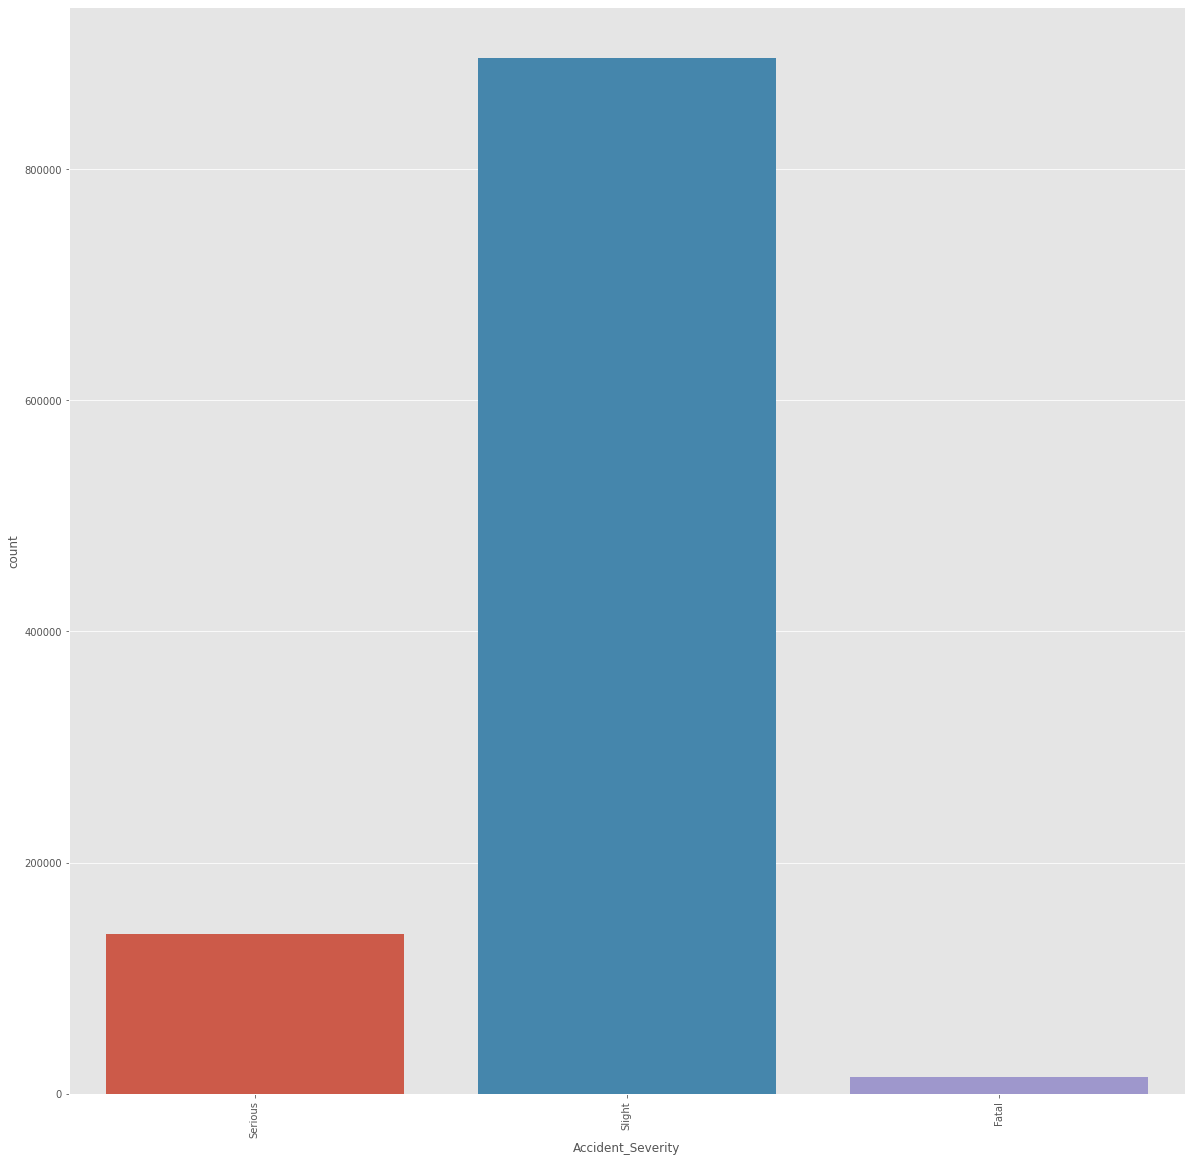

In [30]:
plt.figure(figsize=(20,20))
sns.countplot(x=accident['Accident_Severity'])
plt.xticks(rotation=90)
plt.show()

In [31]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 34 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   1st_Road_Class                               742986 non-null   object 
 2   1st_Road_Number                              1048573 non-null  float64
 3   2nd_Road_Class                               608751 non-null   object 
 4   2nd_Road_Number                              1037772 non-null  float64
 5   Accident_Severity                            1048575 non-null  object 
 6   Carriageway_Hazards                          1048546 non-null  object 
 7   Date                                         1048575 non-null  object 
 8   Day_of_Week                                  1048575 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  1

Quick check of the data.

In [32]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,1048573.0,1011.997007,1832.041637,0.000000,0.000000,125.000000,706.000000,9.999000e+03
2nd_Road_Number,1037772.0,387.000433,1316.672921,0.000000,0.000000,0.000000,0.000000,9.999000e+03
Did_Police_Officer_Attend_Scene_of_Accident,1048306.0,1.198669,0.406263,1.000000,1.000000,1.000000,1.000000,3.000000e+00
Latitude,1048464.0,52.572970,1.424463,49.914430,51.492443,52.343142,53.464070,6.075754e+01
Location_Easting_OSGR,1048464.0,438307.694984,94792.918660,64950.000000,375220.000000,437700.000000,521160.000000,6.555400e+05
Location_Northing_OSGR,1048464.0,298312.981282,158175.671919,10520.000000,178470.000000,272930.000000,396550.000000,1.208800e+06
Longitude,1048463.0,-1.454537,1.391890,-7.516225,-2.371331,-1.435624,-0.244605,1.762010e+00
Number_of_Casualties,1048575.0,1.359930,0.822365,1.000000,1.000000,1.000000,1.000000,6.800000e+01
Number_of_Vehicles,1048575.0,1.835030,0.718145,1.000000,1.000000,2.000000,2.000000,3.200000e+01
Pedestrian_Crossing-Human_Control,1048554.0,0.009292,0.126723,0.000000,0.000000,0.000000,0.000000,2.000000e+00


In [33]:
accident.shape

(1048575, 34)

Lets plot a matrix to see where the missing values are.

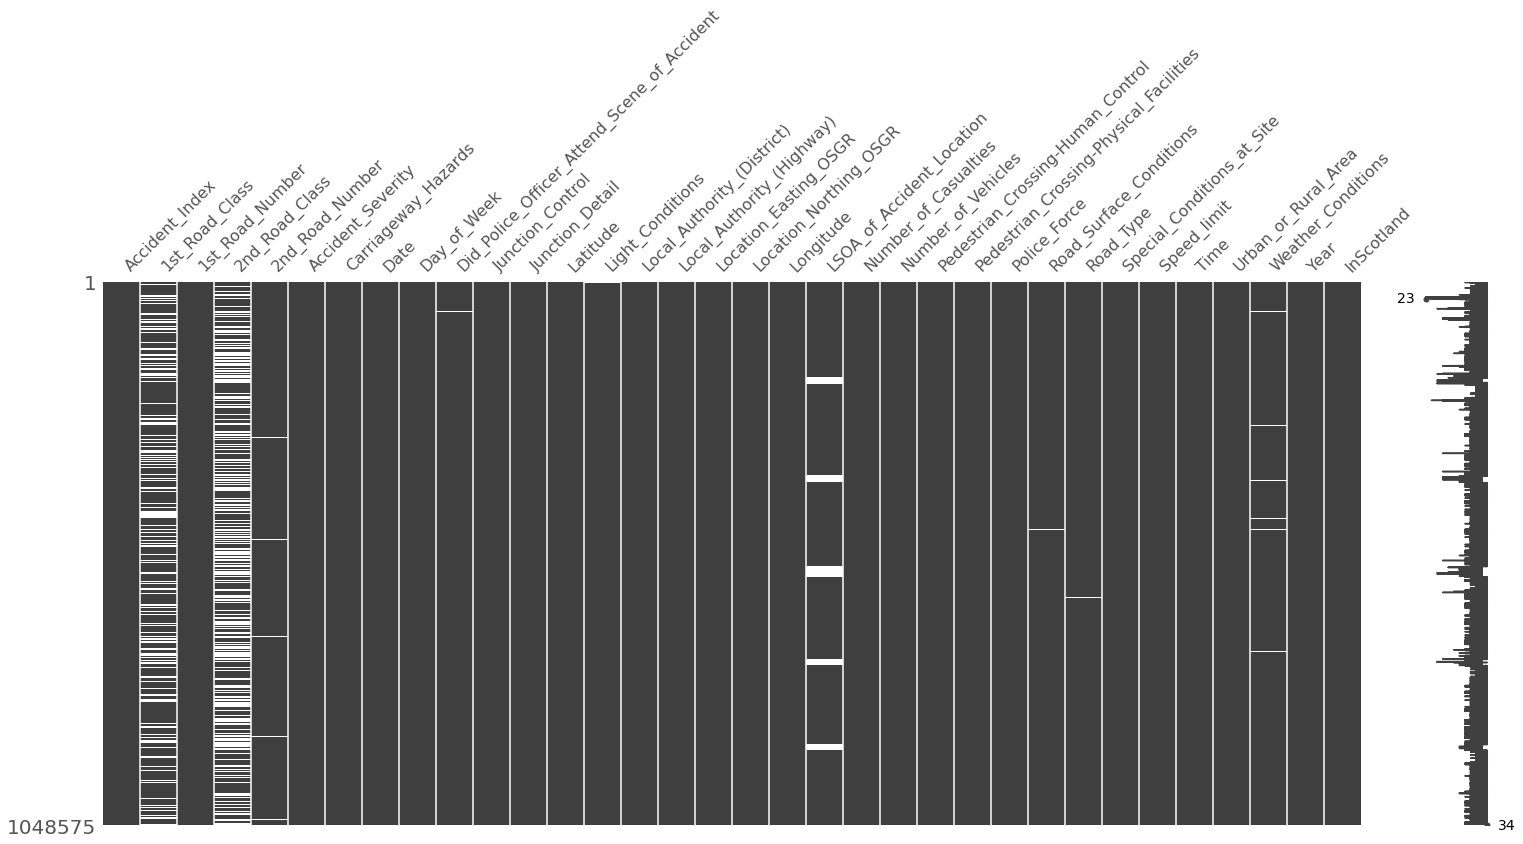

In [38]:
msno.matrix(accident)

Lets 

In [35]:
accident['1st_Road_Class'].unique()

array(['A', 'B', 'C', None, 'Motorway', 'A(M)'], dtype=object)

In [36]:
for column in accident.columns:
    print(column + ' : ' + str(len(accident[column].unique())))
    if(len(accident[column].unique()) < 100):
        print(column + ' : ' + str(accident[column].unique()))
    print('\n')

Accident_Index : 671340


1st_Road_Class : 6
1st_Road_Class : ['A' 'B' 'C' None 'Motorway' 'A(M)']


1st_Road_Number : 6553


2nd_Road_Class : 7
2nd_Road_Class : [None 'C' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


2nd_Road_Number : 6940


Accident_Severity : 3
Accident_Severity : ['Serious' 'Slight' 'Fatal']


Carriageway_Hazards : 7
Carriageway_Hazards : ['None' 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' None]


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']


Did_Police_Officer_Attend_Scene_of_Accident : 4
Did_Police_Officer_Attend_Scene_of_Accident : [ 1.  2.  3. nan]


Junction_Control : 7
Junction_Control : ['Data missing or out of range' 'Auto traffic signal'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']


Junction_Detail

In [37]:
accident.isna().sum()

Accident_Index                                      0
1st_Road_Class                                 305589
1st_Road_Number                                     2
2nd_Road_Class                                 439824
2nd_Road_Number                                 10803
Accident_Severity                                   0
Carriageway_Hazards                                29
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       269
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          111
Light_Conditions                                 2084
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                   

Lets remove the columns that are of no value at this point in the analysis

In [ ]:
accident.shape

(1048575, 25)

Lets remove all the rows in the subset of columns that have null values of below 3%.
Lets convert the the others to our new values.

In [ ]:
accident.dropna(subset=['Carriageway_Hazards', 
                        'Road_Surface_Conditions', 
                        'Road_Type', 
                        'Special_Conditions_at_Site', 
                        'Light_Conditions', 
                        'Pedestrian_Crossing-Human_Control', 
                        'Time',
                        'Urban_or_Rural_Area', 
                        'Pedestrian_Crossing-Physical_Facilities',
                        'InScotland'
                        ], inplace=True)
accident['Weather_Conditions'].replace(np.NaN, 'Unknown', inplace=True)
accident['1st_Road_Class'].replace(np.NaN, 'Unclassified', inplace=True)
accident['2nd_Road_Class'].replace(np.NaN, 'No_2nd_Road_Class', inplace=True)

In [ ]:
accident.isna().sum()

1st_Road_Class                             0
2nd_Road_Class                             0
Accident_Severity                          0
Carriageway_Hazards                        0
Date                                       0
Day_of_Week                                0
Junction_Control                           0
Junction_Detail                            0
Light_Conditions                           0
Local_Authority_(District)                 0
Local_Authority_(Highway)                  0
Number_of_Casualties                       0
Number_of_Vehicles                         0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Police_Force                               0
Road_Surface_Conditions                    0
Road_Type                                  0
Special_Conditions_at_Site                 0
Speed_limit                                0
Time                                       0
Urban_or_Rural_Area                        0
Weather_Co

In [ ]:
def remove_columns(dataset,cols):
    return dataset.drop(cols, axis=1, inplace=True)

remove_columns(accident,['1st_Road_Number',
                         '2nd_Road_Number',
                         'Did_Police_Officer_Attend_Scene_of_Accident',
                         'Latitude',
                         'Longitude',
                         'Location_Easting_OSGR',
                         'Location_Northing_OSGR',
                         'LSOA_of_Accident_Location'
                         ])
accident

,1st_Road_Class,2nd_Road_Class,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,A,None,Serious,None,04/01/2005,Tuesday,Data missing or out of range,Not at junction or within 20 metres,None,Kensington and Chelsea,Kensington and Chelsea,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,B,C,Slight,None,05/01/2005,Wednesday,Auto traffic signal,Crossroads,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,C,None,Slight,None,06/01/2005,Thursday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,A,None,Slight,None,07/01/2005,Friday,Data missing or out of range,Not at junction or within 20 metres,None,Kensington and Chelsea,Kensington and Chelsea,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,None,None,Slight,None,10/01/2005,Monday,Data missing or out of range,Not at junction or within 20 metres,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,A,None,Slight,None,18/02/2010,Thursday,Data missing or out of range,Not at junction or within 20 metres,Daylight,Highland,Highland,2,1,0.0,0.0,Northern,Dry,Single carriageway,None,60,07:00,Rural,Fine no high winds,2010,Yes
1048571,A,None,Slight,None,21/02/2010,Sunday,Data missing or out of range,Not at junction or within 20 metres,Darkness - no lighting,Highland,Highland,1,1,0.0,0.0,Northern,Frost or ice,Single carriageway,None,60,03:00,Rural,Fine no high winds,2010,Yes
1048572,A,Unclassified,Slight,None,23/02/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Daylight,Highland,Highland,1,3,0.0,0.0,Northern,Frost or ice,Single carriageway,None,30,09:38,Rural,Fine no high winds,2010,Yes
1048573,A,Unclassified,Serious,None,23/02/2010,Tuesday,Give way or uncontrolled,T or staggered junction,Darkness - no lighting,Highland,Highland,1,2,0.0,0.0,Northern,Wet or damp,Single carriageway,None,60,18:25,Rural,Fine no high winds,2010,Yes


In [ ]:
accident.shape

(1037796, 25)

In [ ]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037796 entries, 1 to 1048574
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1037796 non-null  object 
 1   2nd_Road_Class                           1037796 non-null  object 
 2   Accident_Severity                        1037796 non-null  object 
 3   Carriageway_Hazards                      1037796 non-null  object 
 4   Date                                     1037796 non-null  object 
 5   Day_of_Week                              1037796 non-null  object 
 6   Junction_Control                         1037796 non-null  object 
 7   Junction_Detail                          1037796 non-null  object 
 8   Light_Conditions                         1037796 non-null  object 
 9   Local_Authority_(District)               1037796 non-null  object 
 10  Local_Authority_(H

We now have a clean dataset.

In [ ]:
for column in accident.columns:
    print(column + ' : ' + str(len(accident[column].unique())))
    if(len(accident[column].unique()) < 100):
        print(column + ' : ' + str(accident[column].unique()))
    print('\n')

1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'Unclassified' 'A' 'Motorway' 'A(M)']


2nd_Road_Class : 7
2nd_Road_Class : ['C' 'No_2nd_Road_Class' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : ['None' 'Other object on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' 'Vehicle load on road'
 'Pedestrian in carriageway - not injured']


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Friday']


Junction_Control : 7
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']


Junction_Detail : 10
Junction_Detail : ['Crossroads' 'Not at junction or within 20 metres'
 'T or staggered junction' 'Mini-roundabout' 'Other junction'
 'More than 4 arms (not roundabo

In [ ]:
def remove_columns(dataset,cols):
    return dataset.drop(cols, axis=1)
remove_columns(accident,['Accident_Index', '1st_Road_Number','2nd_Road_Number','Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude', 'Longitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'LSOA_of_Accident_Location', ])

KeyError: ignored

In [ ]:
accident.shape

(1037796, 25)

In [ ]:
high = accident[Number_of_Vehicles] > 30

NameError: ignored

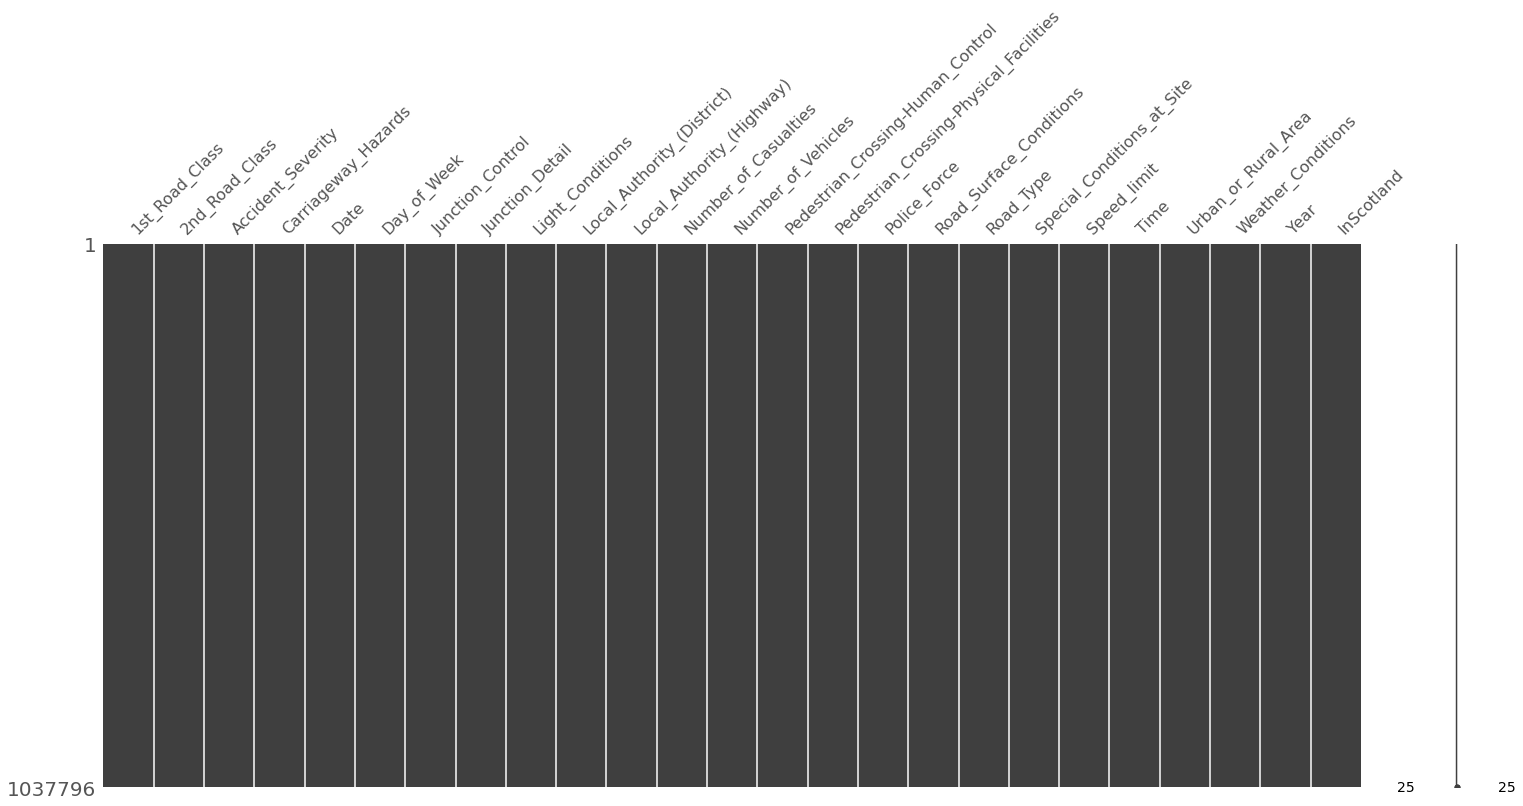

In [ ]:
mno.matrix(accident)

In [ ]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037796 entries, 1 to 1048574
Data columns (total 25 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   1st_Road_Class                           1037796 non-null  object 
 1   2nd_Road_Class                           1037796 non-null  object 
 2   Accident_Severity                        1037796 non-null  object 
 3   Carriageway_Hazards                      1037796 non-null  object 
 4   Date                                     1037796 non-null  object 
 5   Day_of_Week                              1037796 non-null  object 
 6   Junction_Control                         1037796 non-null  object 
 7   Junction_Detail                          1037796 non-null  object 
 8   Light_Conditions                         1037796 non-null  object 
 9   Local_Authority_(District)               1037796 non-null  object 
 10  Local_Authority_(H

In [ ]:
accident.duplicated().sum()

In [ ]:
accident.drop_duplicates(inplace=True)
accident.reset_index(inplace=True, drop=True)

In [ ]:
accident.duplicated().sum()

In [ ]:
accident.shape

In [ ]:
accident.corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x=accident['Speed_limit'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
accident['Speed_limit'].value_counts()

In [ ]:
(accident['Speed_limit'].value_counts() / accident.shape[0]) * 100

In [ ]:
accident['Weather_Conditions'].unique()

In [ ]:
g = sns.FacetGrid(accident, col="Day_of_Week", hue="Accident_Severity")
g.map(sns.scatterplot, "Speed_limit", "Number_of_Casualties", alpha=.7)
g.add_legend()
plt.show()